# 6.18. Lab - Modelling in Python

## Introduction

In this lab we will step through an end-to-end prediction process. Our data comes from the UCI Machine Learning Repository: [bank data](https://archive.ics.uci.edu/ml/datasets/Bank+Marketing)

The goal is binary classification; to predict whether a customer will purchase a banking product marketed over the phone.

## Scenario

You are a data analyst working for a Portuguese bank. The bank has recently run a campaign to attempt to sell a new product to customers over the phone. The product is a term deposit, where customers deposit their money for a fixed period of time for a fixed interest rate. They want to analyze the results of this campaign to understand what makes customers likely to buy this particular product. Your job as the data analyst is to explore the data and use machine learning to build a model to predict whether a customer is likely to buy.

# <font color="red">Section 1 - exploration</font>

Take a look at the data:

In [1]:
import pandas as pd

bank = pd.read_csv('6.18_bank.csv')

bank.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,0.0,0.0,0.0,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,NaN,0.0,0.0,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,0.0,1.0,0.0,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,0.0,0.0,0.0,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,0.0,0.0,1.0,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


#### 1. Read the data dictionary to understand what the columns mean

Which column is the one we will use for prediction?

https://archive.ics.uci.edu/ml/datasets/Bank+Marketing

<span style="color:blue">Column "Y" will be the column used for prediction. It represents if the customer has sign up for the term deposit or not. </span>

#### 2. Summarise the dataset at a high level

- How many rows and columns are there?
- Are there any missing values?
- Are the data types as you would expect them?

What do each of the results tell you in turn?

In [2]:
print (f" the dataset has {bank.shape[0]} rows and {bank.shape[1]} columns")

 the dataset has 41188 rows and 20 columns


<span style="color:blue">Missing values  </span>  
<span style="color:blue">'default' column -- 8597 nulls  </span>  
<span style="color:blue">'housing' column -- 990 nulls  </span>  
<span style="color:blue">'loan' column -- 990 nulls  </span>  

In [3]:
bank.isnull().sum()

age                  0
job                  0
marital              0
education            0
default           8597
housing            990
loan               990
contact              0
month                0
day_of_week          0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
dtype: int64

In [4]:
bank.sample(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
36228,35,blue-collar,single,professional.course,0.0,0.0,0.0,cellular,jun,mon,1,999,0,nonexistent,-2.9,92.963,-40.8,1.266,5076.2,0
31889,33,blue-collar,married,professional.course,NaN,0.0,0.0,cellular,may,thu,2,999,0,nonexistent,-1.8,92.893,-46.2,1.327,5099.1,0
28685,32,admin.,married,university.degree,0.0,1.0,0.0,cellular,apr,thu,1,999,1,failure,-1.8,93.075,-47.1,1.410,5099.1,0
11195,40,blue-collar,married,basic.9y,NaN,0.0,0.0,telephone,jun,thu,1,999,0,nonexistent,1.4,94.465,-41.8,4.961,5228.1,0
11324,42,management,married,university.degree,0.0,0.0,0.0,telephone,jun,thu,2,999,0,nonexistent,1.4,94.465,-41.8,4.961,5228.1,0


<span style="color:blue">most of the data types are what mostly what i would expect them to be.  </span>  
<span style="color:blue">but the binary columns like the 'default', 'housing' and 'loan' column could be int64 instead of float64 to reduce memory usage. </span>  

In [5]:
bank.dtypes

age                 int64
job                object
marital            object
education          object
default           float64
housing           float64
loan              float64
contact            object
month              object
day_of_week        object
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                   int64
dtype: object

#### 3. Investigate your features.

For each variable of interest you may want to:

- Investigate the spread of values
- Check for outliers
    - What do the outliers represent? Are they meaningful or are they more likely to be errors?
    - Are the outliers "different" from our main population in a meaningful way?
    - Do the outliers represent customers that you would still want to make predictions on?

In [6]:
# investigating spread of values of interest
bank[['age','campaign', 'pdays', 'previous','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed']].describe()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [7]:
import seaborn as sns
import plotly.express as px

<span style="color:blue">Outliers are found to be present in the 'cons.conf.idx' column as shown from the boxplots below. However, will keep the outlier data point as this only measuring consumer sentiments which may not reflect accurately the economic conditions </span>

In [8]:
# investigating 'cons.conf.idx' column values with outliers 
fig = px.box(bank, y="cons.conf.idx", width=600, height=400)
fig.show()

<span style="color:blue">Outliers are found to be present in the 'campaign' column and the 'age' column as shown from the boxplots below.  </span>  
<span style="color:blue">the intention of the below cells is to filter only data points that falls within the outlier zone, the area in the chart greater than Q3 +1.5 IQR  </span>
  
<span style="color:blue">and within the outlier zone, we found out that there are customers who signed up for the term deposit.  </span>
<span style="color:blue">this is important information because it probably means that the more contacts performed on the customer, it may increase the chance of customer signing up for the deposit.  </span>
  
<span style="color:blue">for that reason, i would still want the model to fit with data points in the outlier zone. </span>

<Axes: ylabel='campaign'>

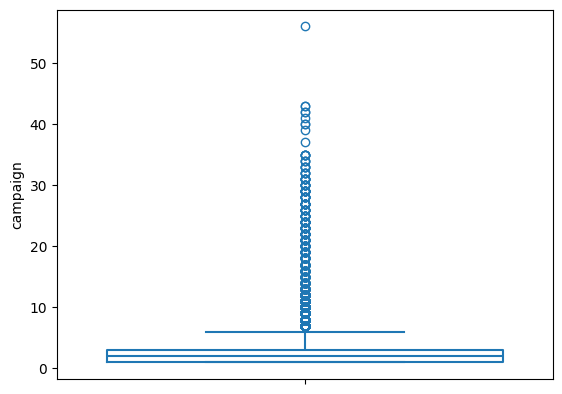

In [9]:
# investigating 'campaign' column values with outliers 
sns.boxplot(y = bank['campaign'], fill = False)

In [10]:
# using plotly as alternative 
fig = px.box(bank, y="campaign", width=600, height=400)
fig.show()

In [11]:
# calculating upper whisker value of the campaign column box plot as seaborne chart does not have tooltips capabilities
print(1.5*(3-1)+3)

6.0


In [12]:
# filtering only the rows that fall above the upper whisker which represents the outlier and inspecting the 'y' column
bank[bank['campaign']>6]['y'].value_counts()

y
0    2295
1     111
Name: count, dtype: int64

<span style="color:blue">For the age feature, the outliers can still be considered as not an error data as it is still possible for humans to live till age of 99. </span>  
<span style="color:blue">Aditionally, the outliers age can still be meaningful for the prediction modelling purpose as there might be a trend with age and the sign up rate. further checks has also shown that customers with ages above the outlier range has sign up for the term deposit</span>  

<Axes: ylabel='age'>

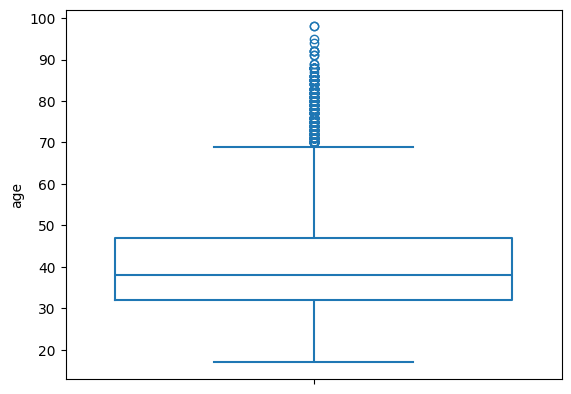

In [13]:
# investigating 'age' column values with outliers 
sns.boxplot(y = bank['age'], fill = False)

In [14]:
# calculating upper whisker value of the age column box plot
print(1.5*(47-32)+47)

69.5


In [15]:
# filtering only the rows that fall above the upper whisker which represents the outlier and inspecting the 'y' column
bank[bank['age']>69.5]['y'].value_counts()

y
0    248
1    221
Name: count, dtype: int64

<span style="color:blue"> there are outliers in the 'previous' column </span>  
<span style="color:blue"> but we might draw some trends on the relationship between previous campaign contacts and current cpaign success rates </span>  

<Axes: ylabel='previous'>

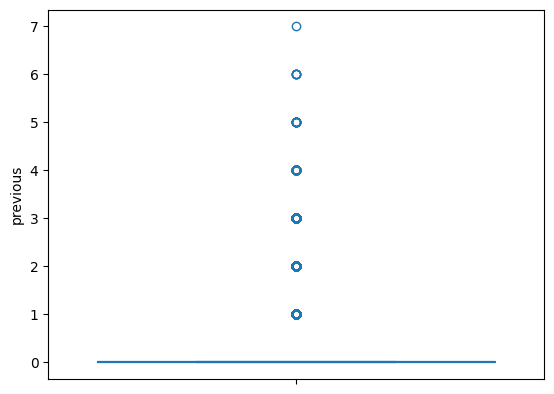

In [16]:
# investigating 'previous' column values with outliers 
sns.boxplot(y = bank['previous'], fill = False)

In [17]:
bank[bank['previous']>0]['y'].value_counts()

y
0    4126
1    1499
Name: count, dtype: int64

#### 4. Deal with outliers

Based on your answers to question 3, decide whether to drop or keep your outliers

<span style="color:blue">I would still keep the outlier data points from the 'age','campign' and 'previous' columns as those features has meaning to the prediction model.</span>

#### 5. Investigate some of the categorical columns

First, identify which columns are categorical (including binary)

Investigate the breakdown of values of some of these columns. If you notice any odd values, investigate them and deal with them (either drop or keep them).

In [18]:
# checking for odd values for all columns 

In [19]:
bank.job.unique()

array(['housemaid', 'services', 'admin.', 'blue-collar', 'technician',
       'retired', 'management', 'unemployed', 'self-employed', 'unknown',
       'entrepreneur', 'student'], dtype=object)

<span style="color:blue">under the marital column, there is a 'unknown' value. since it is only 80 rows which is less than 1% of total rows,  </span>  
<span style="color:blue">it will not affect the analyses results significantly. hence will drop the unknown rows. </span>  

In [20]:
bank[bank['marital']=='unknown']['y'].value_counts()

y
0    68
1    12
Name: count, dtype: int64

In [21]:
bank_cleaned_df = bank[bank['marital']!='unknown']
bank_cleaned_df.marital.value_counts()

marital
married     24928
single      11568
divorced     4612
Name: count, dtype: int64

In [22]:
# check education column for odd values
bank['education'].value_counts()

education
university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: count, dtype: int64

<span style="color:blue">checking the number of unknown education rows that records signing up for the term deposit. </span>   
<span style="color:blue"> since it the number of sign ups is around 5% of the total sign ups, keeping the unkown education values is justifiable as there are other features for the affected rows for analysis</span> 

In [23]:
bank[bank['education']=='unknown']['y'].value_counts()

y
0    1480
1     251
Name: count, dtype: int64

In [24]:
# checking default column 
bank_cleaned_df['default'].unique()

array([ 0., nan,  1.])

<span style="color:blue">default column is binary, will assume nan values as 0, hence will replace miissing nan values as 0</span>   

In [25]:
bank_cleaned_df['default'].fillna(0, inplace=True)

C:\Users\yingw\AppData\Local\Temp\ipykernel_44312\3848829742.py:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



C:\Users\yingw\AppData\Local\Temp\ipykernel_44312\3848829742.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [26]:
# check housing column for odd values, and replace nan with 0. same justification as the default column
bank_cleaned_df['housing'].fillna(0, inplace=True)

C:\Users\yingw\AppData\Local\Temp\ipykernel_44312\4029953707.py:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



C:\Users\yingw\AppData\Local\Temp\ipykernel_44312\4029953707.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [27]:
# checking loan column and replacing null values with 0
bank_cleaned_df.loan.unique()

array([ 0.,  1., nan])

In [28]:
bank_cleaned_df['loan'].fillna(0, inplace=True)
bank_cleaned_df.loan.unique()

C:\Users\yingw\AppData\Local\Temp\ipykernel_44312\2503109056.py:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



C:\Users\yingw\AppData\Local\Temp\ipykernel_44312\2503109056.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



array([0., 1.])

In [29]:
# check contact column and found no issue
bank_cleaned_df.contact.unique()

array(['telephone', 'cellular'], dtype=object)

In [30]:
# check month column and found no issue
bank_cleaned_df.month.unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'mar', 'apr',
       'sep'], dtype=object)

In [31]:
# check month day_of_week column and found no issue
bank_cleaned_df["day_of_week"].unique()

array(['mon', 'tue', 'wed', 'thu', 'fri'], dtype=object)

In [32]:
# check month poutcome column and found no issue
bank_cleaned_df["poutcome"].unique()

array(['nonexistent', 'failure', 'success'], dtype=object)

In [33]:
# check month y column and found no issue
bank_cleaned_df["y"].unique()

array([0, 1])

In [34]:
# final check for null values
bank_cleaned_df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

#### 6. Now explore the relationships between your potential features and the target

The sorts of questions you are interested in are "how does the distribution of our target vary across values of our features?" - in this case "how does the % of people who purchased the product vary by age/job/education level etc.?"

First, focus on the numeric columns.

You may decide to group your continuous columns (like age) into buckets and calculate the % of people who purchased the product. A trick you can use here is that taking the average of a binary column gives you the % of 1s in that column.

What do you conclude about the relationship between your columns and the likelihood of purchasing the product?

<span style="color:blue">Categorical columns include 'age','campaign', 'pdays', 'emp.var.rate', 'cons.price.idx','cons.conf.idx', 'euribor3m' , 'nr.employed'</span>  

In [35]:
bank_cleaned_df.describe()

,age,default,housing,loan,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
count,41108.000000,41108.000000,41108.000000,41108.000000,41108.000000,41108.000000,41108.000000,41108.000000,41108.000000,41108.000000,41108.000000,41108.000000,41108.000000
mean,40.023572,0.000073,0.524010,0.151698,2.566386,962.524837,0.172764,0.082475,93.575868,-40.501983,3.621891,5167.054675,0.112581
std,10.420661,0.008543,0.499429,0.358732,2.767601,186.790167,0.494773,1.570760,0.578728,4.627360,1.734276,72.255347,0.316084
min,17.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000
25%,32.000000,0.000000,0.000000,0.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.000000
50%,38.000000,0.000000,1.000000,0.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.000000
75%,47.000000,0.000000,1.000000,0.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000
max,98.000000,1.000000,1.000000,1.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000


In [36]:
# percentage of total contacted customers that signed up for the term deposit
print (f'{ round (float(bank_cleaned_df['y'].mean()) * 100,2) }% of the total contacted customers signed up for the term deposit')

11.26% of the total contacted customers signed up for the term deposit


In [37]:
# number of sign ups
cust_sign_up_num = bank_cleaned_df['y'].sum()
print(cust_sign_up_num)

4628


<span style="color:blue">Looking at the distribution of pdays below. seems like 96% of people contacted for the current campaign was not previously contacted. Since the pdays is not evenly distributed, we will not be focusing on this feature for the prediction modelling</span>  

In [38]:
bank_cleaned_df.pdays.value_counts()

pdays
999    39598
3        439
6        410
4        117
9         64
2         61
7         60
12        58
10        52
5         46
13        36
11        27
1         26
15        24
14        20
8         18
0         15
16        10
17         8
18         7
22         3
19         3
21         2
25         1
26         1
27         1
20         1
Name: count, dtype: int64

In [39]:
bank_cleaned_df['emp.var.rate'].unique()

array([ 1.1,  1.4, -0.1, -0.2, -1.8, -2.9, -3.4, -3. , -1.7, -1.1])

<span style="color:blue">employment variation rate will be a feature of interest as with the different employment variance rate, percentage of people purchased varies.</span>  

In [40]:
# percentage of sign ups by employment variation rate
groupby_evr_purchase = bank_cleaned_df.groupby('emp.var.rate')['y'].mean()
groupby_evr_purchase_df = pd.DataFrame(groupby_evr_purchase)
groupby_evr_purchase_df= groupby_evr_purchase_df.rename(columns={'y': 'pct_purchased'})
groupby_evr_purchase_df = groupby_evr_purchase_df.sort_values('pct_purchased', ascending= False)
groupby_evr_purchase_df

,pct_purchased
emp.var.rate,
-1.7,0.521345
-3.0,0.511628
-1.1,0.474763
-3.4,0.423761
-2.9,0.356669
-1.8,0.159170
-0.2,0.100000
-0.1,0.063112
1.4,0.053180


<span style="color:blue">the spread of consumer price index is shown below to be of a small spread, with min at 92.2 and max at 94.76. with the small spread, it will less likely to affect the predictive modelling hence will decide not to include consumer price index as a predictive feature.</span>  

In [41]:
bank_cleaned_df['cons.price.idx'].describe()

count    41108.000000
mean        93.575868
std          0.578728
min         92.201000
25%         93.075000
50%         93.749000
75%         93.994000
max         94.767000
Name: cons.price.idx, dtype: float64

<span style="color:blue"> it appears that at different consumer confidence index, the percentage of sign up varies. Hence, consumer confidence index will be a feature of interest the predictive modelling</span>  

In [42]:
bank_cleaned_df.groupby('cons.conf.idx')['y'].mean()

cons.conf.idx
-50.8    0.453125
-50.0    0.448399
-49.5    0.458128
-47.1    0.180041
-46.2    0.090547
-45.9    0.100000
-42.7    0.060665
-42.0    0.052646
-41.8    0.043070
-40.8    0.369382
-40.4    0.626866
-40.3    0.565916
-40.0    0.575472
-39.8    0.467249
-38.3    0.515021
-37.5    0.495050
-36.4    0.030847
-36.1    0.052051
-34.8    0.564885
-34.6    0.557471
-33.6    0.370787
-33.0    0.511628
-31.4    0.341591
-30.1    0.470588
-29.8    0.397004
-26.9    0.402247
Name: y, dtype: float64

In [43]:
# Define the function to categorize the euribor3m
def categorize_interest(rate):
    if 0.5 <= rate < 1.5:
        return '0.5-1.4'
    elif 1.5 <= rate < 2.5:
        return '1.5-2.4'
    elif 2.5 <= rate < 3.5:
        return '2.5-3.4'
    elif 3.5 <= rate < 4.5:
        return '3.5-4.4'
    else:
        return 'above 4.5'

# Apply the function to the 'age' column and create the 'age_group' column
bank_cleaned_df['interest_cat'] = bank_cleaned_df['euribor3m'].apply(categorize_interest)
bank_cleaned_df

C:\Users\yingw\AppData\Local\Temp\ipykernel_44312\3846412635.py:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,interest_cat
0,56,housemaid,married,basic.4y,0.0,0.0,0.0,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,above 4.5
1,57,services,married,high.school,0.0,0.0,0.0,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,above 4.5
2,37,services,married,high.school,0.0,1.0,0.0,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,above 4.5
3,40,admin.,married,basic.6y,0.0,0.0,0.0,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,above 4.5
4,56,services,married,high.school,0.0,0.0,1.0,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,above 4.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,0.0,1.0,0.0,cellular,nov,fri,...,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1,0.5-1.4
41184,46,blue-collar,married,professional.course,0.0,0.0,0.0,cellular,nov,fri,...,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0,0.5-1.4
41185,56,retired,married,university.degree,0.0,1.0,0.0,cellular,nov,fri,...,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0,0.5-1.4
41186,44,technician,married,professional.course,0.0,0.0,0.0,cellular,nov,fri,...,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1,0.5-1.4


<span style="color:blue"> different interest rate range appears to have different successful sign up range. hence it is a feature of interest </span>  

In [44]:
# percentage of sign ups by interest rate category
int_purchase = bank_cleaned_df.groupby('interest_cat')['y'].mean()
int_purchase_df = pd.DataFrame(int_purchase)
int_purchase_df= int_purchase_df.rename(columns={'y': 'pct_purchased'})
int_purchase_df = int_purchase_df.sort_values('pct_purchased', ascending= False)
int_purchase_df

,pct_purchased
interest_cat,
1.5-2.4,0.448399
0.5-1.4,0.240291
2.5-3.4,0.200000
3.5-4.4,0.050404
above 4.5,0.047906


In [45]:
bank_cleaned_df.campaign.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 19, 18, 23, 14,
       22, 25, 16, 17, 15, 20, 56, 39, 35, 42, 28, 26, 27, 32, 21, 24, 29,
       31, 30, 41, 37, 40, 33, 34, 43])

<span style="color:blue"> different number of calls for this campaign has varying percentage of people signing up </span>  

In [46]:
# Define the function to categorize the campaign contacts
def categorize_contact_num(num):
    if 1 <= num < 10:
        return '1-9'
    elif 10 <= num < 20:
        return '10-19'
    elif 20 <= num < 30:
        return '20-29'
    elif 30 <= num < 44:
        return '30-43'

bank_cleaned_df['campaign_cat'] = bank_cleaned_df['campaign'].apply(categorize_contact_num)
bank_cleaned_df.head()

C:\Users\yingw\AppData\Local\Temp\ipykernel_44312\340304668.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,interest_cat,campaign_cat
0,56,housemaid,married,basic.4y,0.0,0.0,0.0,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,above 4.5,1-9
1,57,services,married,high.school,0.0,0.0,0.0,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,above 4.5,1-9
2,37,services,married,high.school,0.0,1.0,0.0,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,above 4.5,1-9
3,40,admin.,married,basic.6y,0.0,0.0,0.0,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,above 4.5,1-9
4,56,services,married,high.school,0.0,0.0,1.0,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,above 4.5,1-9


In [47]:
# percentage of sign ups by campaign_cat
campaign_purchase = bank_cleaned_df.groupby('campaign_cat')['y'].mean()
campaign_purchase_df = pd.DataFrame(campaign_purchase)
campaign_purchase_df= campaign_purchase_df.rename(columns={'y': 'pct_purchased'})
campaign_purchase_df = campaign_purchase_df.sort_values('pct_purchased', ascending= False)
campaign_purchase_df

,pct_purchased
campaign_cat,
1-9,0.114671
10-19,0.042082
20-29,0.006849
30-43,0.000000


<span style="color:blue"> different number of employees has different success rate of sign up   hence this feature is of interest. </span>  

In [48]:
# Define the function to categorize the nr.employed
def categorize_nr_employed(emp):
    if 4950 <= emp < 5050:
        return '4950-5049'
    elif 5050 <= emp < 5150:
        return '5050-5149'
    elif 5150 <= emp < 5251:
        return '5150-5250'

bank_cleaned_df['emp_cat'] = bank_cleaned_df['nr.employed'].apply(categorize_nr_employed)
bank_cleaned_df.head()

C:\Users\yingw\AppData\Local\Temp\ipykernel_44312\3463500380.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,interest_cat,campaign_cat,emp_cat
0,56,housemaid,married,basic.4y,0.0,0.0,0.0,telephone,may,mon,...,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,above 4.5,1-9,5150-5250
1,57,services,married,high.school,0.0,0.0,0.0,telephone,may,mon,...,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,above 4.5,1-9,5150-5250
2,37,services,married,high.school,0.0,1.0,0.0,telephone,may,mon,...,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,above 4.5,1-9,5150-5250
3,40,admin.,married,basic.6y,0.0,0.0,0.0,telephone,may,mon,...,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,above 4.5,1-9,5150-5250
4,56,services,married,high.school,0.0,0.0,1.0,telephone,may,mon,...,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,above 4.5,1-9,5150-5250


In [49]:
# percentage of sign ups by emp_cat
emp_purchase = bank_cleaned_df.groupby('emp_cat')['y'].mean()
emp_purchase_df = pd.DataFrame(emp_purchase)
emp_purchase_df= emp_purchase_df.rename(columns={'y': 'pct_purchased'})
emp_purchase_df = emp_purchase_df.sort_values('pct_purchased', ascending= False)
emp_purchase_df

,pct_purchased
emp_cat,
4950-5049,0.489078
5050-5149,0.165405
5150-5250,0.048258


<span style="color:blue"> different age groups has different success rate of sign up as shown in the graph below,  hence this feature is of interest. </span>  

In [50]:
# Define the function to categorize the age
def categorize_age(age):
    if 15 <= age < 25:
        return '15-24'
    elif 25 <= age < 35:
        return '25-34'
    elif 35 <= age < 45:
        return '35-44'
    elif 45 <= age < 55:
        return '45-54'
    elif 55 <= age < 65:
        return '55-64'
    elif 65 <= age < 75:
        return '65-74'
    elif 75 <= age < 85:
        return '75-84'
    else:
        return 'above 85'

# Apply the function to the 'age' column and create the 'age_group' column
bank_cleaned_df['age_group'] = bank_cleaned_df['age'].apply(categorize_age)

C:\Users\yingw\AppData\Local\Temp\ipykernel_44312\2235545252.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [51]:
# percentage of sign ups by age group
age_purchase = bank_cleaned_df.groupby('age_group')['y'].mean()
age_purchase_df = pd.DataFrame(age_purchase)
age_purchase_df= age_purchase_df.rename(columns={'y': 'pct_purchased'})
age_purchase_df = age_purchase_df.sort_values('pct_purchased', ascending= False)

In [52]:
#bar chart visualise group by age group
fig = px.bar(age_purchase_df)
fig.update_layout(yaxis_title = "percentage of sign up per age group")
fig.update_layout(xaxis_title = "age group")

#### 7. Now investigate the relationship between the categorical variables and the target

First, identify which columns in the data are categorical.

The question we care about again is "how does the % of customers who bought the product vary among different jobs/education levels etc.?"


<span style="color:blue">Categorical columns include 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact','month', 'day_of_week', poutcome' </span>  
  
<span style="color:blue"> the percentage of customers are different when compared to different jobs and education level, indicating that it should be a feature of interest</span>  



In [53]:
# percentage of sign ups by jobs
groupby_job_purchase = bank_cleaned_df.groupby('job')['y'].mean()
groupby_job_purchase_df = pd.DataFrame(groupby_job_purchase)
groupby_job_purchase_df= groupby_job_purchase_df.rename(columns={'y': 'pct_purchased'})
groupby_job_purchase_df = groupby_job_purchase_df.sort_values('pct_purchased', ascending= False)

In [54]:
#bar chart visualise group by job type
fig = px.bar(groupby_job_purchase_df)
fig.update_layout(yaxis_title = "percentage of sign up per job type")
fig.update_layout(xaxis_title = "job type")

In [55]:
# percentage of sign ups by jobs
groupby_edu_purchase = bank_cleaned_df.groupby('education')['y'].mean()
groupby_edu_purchase_df = pd.DataFrame(groupby_edu_purchase)
groupby_edu_purchase_df= groupby_edu_purchase_df.rename(columns={'y': 'pct_purchased'})
groupby_edu_purchase_df = groupby_edu_purchase_df.sort_values('pct_purchased', ascending= False)

In [56]:
#bar chart visualise group by job type
fig = px.bar(groupby_edu_purchase_df)
fig.update_layout(yaxis_title = "percentage of sign up per education level")
fig.update_layout(xaxis_title = "edu level")

In [57]:
# percentage of sign ups by marital status
groupby_marital_purchase = bank_cleaned_df.groupby('marital')['y'].mean()
groupby_marital_purchase_df = pd.DataFrame(groupby_marital_purchase)
groupby_marital_purchase_df= groupby_marital_purchase_df.rename(columns={'y': 'pct_purchased'})
groupby_marital_purchase_df = groupby_marital_purchase_df.sort_values('pct_purchased', ascending= False)

In [58]:
#bar chart visualise group by marital status
fig = px.bar(groupby_marital_purchase_df)
fig.update_layout(yaxis_title = "percentage of sign up per marital status")
fig.update_layout(xaxis_title = "marital status")

In [59]:
# percentage of sign ups by contact method
groupby_contact_purchase = bank_cleaned_df.groupby('contact')['y'].mean()
groupby_contact_purchase_df = pd.DataFrame(groupby_contact_purchase)
groupby_contact_purchase_df= groupby_contact_purchase_df.rename(columns={'y': 'pct_purchased'})
groupby_contact_purchase_df = groupby_contact_purchase_df.sort_values('pct_purchased', ascending= False)

In [60]:
#bar chart visualise group by contact method
fig = px.bar(groupby_contact_purchase_df)
fig.update_layout(yaxis_title = "percentage of sign up per contact method")
fig.update_layout(xaxis_title = "contact method")

In [61]:
# percentage of sign ups by month 
groupby_month_purchase = bank_cleaned_df.groupby('month')['y'].mean()
groupby_month_purchase_df = pd.DataFrame(groupby_month_purchase)
groupby_month_purchase_df= groupby_month_purchase_df.rename(columns={'y': 'pct_purchased'})
groupby_month_purchase_df = groupby_month_purchase_df.sort_values('pct_purchased', ascending= False)

In [62]:
#bar chart visualise group by month
fig = px.bar(groupby_month_purchase_df)
fig.update_layout(yaxis_title = "percentage of sign up per month")
fig.update_layout(xaxis_title = "month")

In [63]:
# percentage of sign ups by day_of_month
groupby_day_purchase = bank_cleaned_df.groupby('day_of_week')['y'].mean()
groupby_day_purchase_df = pd.DataFrame(groupby_day_purchase)
groupby_day_purchase_df= groupby_day_purchase_df.rename(columns={'y': 'pct_purchased'})
groupby_day_purchase_df = groupby_day_purchase_df.sort_values('pct_purchased', ascending= False)
groupby_day_purchase_df

,pct_purchased
day_of_week,
thu,0.121177
tue,0.117960
wed,0.116379
fri,0.107997
mon,0.099353


In [64]:
#bar chart visualise group by day of week
fig = px.bar(groupby_day_purchase_df)
fig.update_layout(yaxis_title = "percentage of sign up per day of week")
fig.update_layout(xaxis_title = "day")

In [65]:
# percentage of sign ups by loan
groupby_loan_purchase = bank_cleaned_df.groupby('loan')['y'].mean()
groupby_loan_purchase_df = pd.DataFrame(groupby_loan_purchase)
groupby_loan_purchase_df= groupby_loan_purchase_df.rename(columns={'y': 'pct_purchased'})
groupby_loan_purchase_df = groupby_loan_purchase_df.sort_values('pct_purchased', ascending= False)
groupby_loan_purchase_df

,pct_purchased
loan,
0.0,0.113157
1.0,0.109365


In [66]:
# percentage of sign ups by housing
groupby_housing_purchase = bank_cleaned_df.groupby('housing')['y'].mean()
groupby_housing_purchase_df = pd.DataFrame(groupby_housing_purchase)
groupby_housing_purchase_df= groupby_housing_purchase_df.rename(columns={'y': 'pct_purchased'})
groupby_housing_purchase_df = groupby_housing_purchase_df.sort_values('pct_purchased', ascending= False)
groupby_housing_purchase_df

,pct_purchased
housing,
1.0,0.116151
0.0,0.108652


In [67]:
# percentage of sign ups by default
groupby_default_purchase = bank_cleaned_df.groupby('default')['y'].mean()
groupby_default_purchase_df = pd.DataFrame(groupby_default_purchase)
groupby_default_purchase_df= groupby_default_purchase_df.rename(columns={'y': 'pct_purchased'})
groupby_default_purchase_df = groupby_default_purchase_df.sort_values('pct_purchased', ascending= False)
groupby_default_purchase_df

,pct_purchased
default,
0.0,0.11259
1.0,0.00000


In [68]:
# percentage of sign ups by poutcome
groupby_poutcome_purchase = bank_cleaned_df.groupby('poutcome')['y'].mean()
groupby_poutcome_purchase_df = pd.DataFrame(groupby_poutcome_purchase)
groupby_poutcome_purchase_df= groupby_poutcome_purchase_df.rename(columns={'y': 'pct_purchased'})
groupby_poutcome_purchase_df = groupby_poutcome_purchase_df.sort_values('pct_purchased', ascending= False)
groupby_poutcome_purchase_df

,pct_purchased
poutcome,
success,0.651316
failure,0.142486
nonexistent,0.088251


#### 8. Using the results of your EDA choose your features to put into your first predictive model

A "good" feature is one which contains *variance of the outcome*. For example, if people in all age groups bought the product at around the same %, age would **not** be a good feature, because it doesn't get us closer to separating those that bought from those that didn't.

<span style="color:green">Numerical features of interest : emp.var.rate / cons.conf.idx / euribor3m / campaign / nr.employed / age  </span>    
<span style="color:green">Categorical features of interest : job / education / marital status /  contact / month / default  / poutcome  </span>    
<span style="color:red"> Numerical features that are not included : pdays / previous  </span>  
<span style="color:red"> Categorical features that are not included : day_of_week / housing / loan</span>  

# <font color="red">Part 2 - our first model</font>

It's time to build your first predictive model.

#### 1. First, do any transformations required to our data
    
- If you haven't already, based on your EDA results drop any values you don't wish to use (outliers, certain categories)
- For your categorical column(s) convert the columns to a dummy (one-hot encoded) representation if you wish to use them

Once you convert the categories to dummies, drop one of the columns per category. Remember this acts as a "reference", as your "default" category. Typically we choose the category containing the most values.

In [69]:
bank_cleaned_df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'campaign', 'pdays', 'previous',
       'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed', 'y', 'interest_cat', 'campaign_cat',
       'emp_cat', 'age_group'],
      dtype='object')

In [70]:
bank_model_df = bank_cleaned_df[['age','job','education','default','contact','marital','month', 'campaign', 'poutcome', 'emp.var.rate', 'cons.conf.idx', 'euribor3m','nr.employed', 'y']]
bank_model_df

,age,job,education,default,contact,marital,month,campaign,poutcome,emp.var.rate,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,basic.4y,0.0,telephone,married,may,1,nonexistent,1.1,-36.4,4.857,5191.0,0
1,57,services,high.school,0.0,telephone,married,may,1,nonexistent,1.1,-36.4,4.857,5191.0,0
2,37,services,high.school,0.0,telephone,married,may,1,nonexistent,1.1,-36.4,4.857,5191.0,0
3,40,admin.,basic.6y,0.0,telephone,married,may,1,nonexistent,1.1,-36.4,4.857,5191.0,0
4,56,services,high.school,0.0,telephone,married,may,1,nonexistent,1.1,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,professional.course,0.0,cellular,married,nov,1,nonexistent,-1.1,-50.8,1.028,4963.6,1
41184,46,blue-collar,professional.course,0.0,cellular,married,nov,1,nonexistent,-1.1,-50.8,1.028,4963.6,0
41185,56,retired,university.degree,0.0,cellular,married,nov,2,nonexistent,-1.1,-50.8,1.028,4963.6,0
41186,44,technician,professional.course,0.0,cellular,married,nov,1,nonexistent,-1.1,-50.8,1.028,4963.6,1


In [71]:
# one -hot encoding for contact
contact_dummies = pd.get_dummies(bank_model_df.contact , prefix = 'contact')
contact_dummies.sample(5)

,contact_cellular,contact_telephone
33937,True,False
2073,False,True
39645,True,False
5883,False,True
841,False,True


In [72]:
pd.DataFrame(contact_dummies.value_counts())

,,count
contact_cellular,contact_telephone,
True,False,26091
False,True,15017


In [73]:
# drop contact_cellular as it will be the base
contact_dummies.drop(contact_dummies.columns[0], axis = 1, inplace = True)

In [74]:
# concate two dataframes together
bank_model_df = pd.concat([bank_model_df,contact_dummies], axis = 1)

In [75]:
bank_model_df

,age,job,education,default,contact,marital,month,campaign,poutcome,emp.var.rate,cons.conf.idx,euribor3m,nr.employed,y,contact_telephone
0,56,housemaid,basic.4y,0.0,telephone,married,may,1,nonexistent,1.1,-36.4,4.857,5191.0,0,True
1,57,services,high.school,0.0,telephone,married,may,1,nonexistent,1.1,-36.4,4.857,5191.0,0,True
2,37,services,high.school,0.0,telephone,married,may,1,nonexistent,1.1,-36.4,4.857,5191.0,0,True
3,40,admin.,basic.6y,0.0,telephone,married,may,1,nonexistent,1.1,-36.4,4.857,5191.0,0,True
4,56,services,high.school,0.0,telephone,married,may,1,nonexistent,1.1,-36.4,4.857,5191.0,0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,professional.course,0.0,cellular,married,nov,1,nonexistent,-1.1,-50.8,1.028,4963.6,1,False
41184,46,blue-collar,professional.course,0.0,cellular,married,nov,1,nonexistent,-1.1,-50.8,1.028,4963.6,0,False
41185,56,retired,university.degree,0.0,cellular,married,nov,2,nonexistent,-1.1,-50.8,1.028,4963.6,0,False
41186,44,technician,professional.course,0.0,cellular,married,nov,1,nonexistent,-1.1,-50.8,1.028,4963.6,1,False


In [76]:
bank_model_df['education'].unique()

array(['basic.4y', 'high.school', 'basic.6y', 'basic.9y',
       'professional.course', 'unknown', 'university.degree',
       'illiterate'], dtype=object)

In [77]:
#ordinal encoding for education 
bank_model_df['edu_num'] = bank_model_df.education.map({'unknown':1,'illiterate': 2,'basic.4y':3,'basic.6y':4, 'basic.9y':5,'high.school':6, 
                                                        'university.degree':7, 'professional.course': 8 })

In [78]:
bank_model_df

,age,job,education,default,contact,marital,month,campaign,poutcome,emp.var.rate,cons.conf.idx,euribor3m,nr.employed,y,contact_telephone,edu_num
0,56,housemaid,basic.4y,0.0,telephone,married,may,1,nonexistent,1.1,-36.4,4.857,5191.0,0,True,3
1,57,services,high.school,0.0,telephone,married,may,1,nonexistent,1.1,-36.4,4.857,5191.0,0,True,6
2,37,services,high.school,0.0,telephone,married,may,1,nonexistent,1.1,-36.4,4.857,5191.0,0,True,6
3,40,admin.,basic.6y,0.0,telephone,married,may,1,nonexistent,1.1,-36.4,4.857,5191.0,0,True,4
4,56,services,high.school,0.0,telephone,married,may,1,nonexistent,1.1,-36.4,4.857,5191.0,0,True,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,professional.course,0.0,cellular,married,nov,1,nonexistent,-1.1,-50.8,1.028,4963.6,1,False,8
41184,46,blue-collar,professional.course,0.0,cellular,married,nov,1,nonexistent,-1.1,-50.8,1.028,4963.6,0,False,8
41185,56,retired,university.degree,0.0,cellular,married,nov,2,nonexistent,-1.1,-50.8,1.028,4963.6,0,False,7
41186,44,technician,professional.course,0.0,cellular,married,nov,1,nonexistent,-1.1,-50.8,1.028,4963.6,1,False,8


In [79]:
# one -hot encoding for marital
marital_dummies = pd.get_dummies(bank_model_df.marital , prefix = 'marital')
marital_dummies.value_counts()

marital_divorced  marital_married  marital_single
False             True             False             24928
                  False            True              11568
True              False            False              4612
Name: count, dtype: int64

In [80]:
# dropping marital_married as it has the most values and will be the base 
marital_dummies.drop(marital_dummies.columns[1], axis = 1, inplace = True)

In [81]:
# concating marital dummies with main model df
bank_model_df = pd.concat([bank_model_df,marital_dummies], axis = 1)

In [82]:
# one -hot encoding for poutcome
poutcome_dummies = pd.get_dummies(bank_model_df.poutcome , prefix = 'poutcome')
poutcome_dummies.value_counts()

poutcome_failure  poutcome_nonexistent  poutcome_success
False             True                  False               35501
True              False                 False                4239
False             False                 True                 1368
Name: count, dtype: int64

In [83]:
# dropping poutcome_nonexistant as it has the most values and will be the base 
poutcome_dummies.drop(poutcome_dummies.columns[1], axis = 1, inplace = True)

In [84]:
# concating poutcome dummies with main model df
bank_model_df = pd.concat([bank_model_df,poutcome_dummies], axis = 1)

In [85]:
bank_model_df.sample(5)

,age,job,education,default,contact,marital,month,campaign,poutcome,emp.var.rate,cons.conf.idx,euribor3m,nr.employed,y,contact_telephone,edu_num,marital_divorced,marital_single,poutcome_failure,poutcome_success
11946,36,technician,basic.9y,0.0,telephone,married,jun,4,nonexistent,1.4,-41.8,4.958,5228.1,0,True,5,False,False,False,False
18915,41,unknown,unknown,0.0,cellular,married,aug,2,nonexistent,1.4,-36.1,4.970,5228.1,0,False,1,False,False,False,False
27910,58,unemployed,basic.4y,0.0,cellular,married,mar,4,nonexistent,-1.8,-50.0,1.538,5099.1,0,False,3,False,False,False,False
26201,37,management,unknown,0.0,cellular,married,nov,2,nonexistent,-0.1,-42.0,4.076,5195.8,0,False,1,False,False,False,False
27861,33,blue-collar,high.school,0.0,cellular,single,mar,10,nonexistent,-1.8,-50.0,1.602,5099.1,0,False,6,False,True,False,False


In [86]:
#ordinal encoding for month 
bank_model_df['edu_num'] = bank_model_df.education.map({'unknown':1,'illiterate': 2,'basic.4y':3,'basic.6y':4, 'basic.9y':5,'high.school':6, 
                                                        'university.degree':7, 'professional.course': 8 })

In [87]:
#one-hot encoding for month
#setting month of may as baseline
month_dummies = pd.get_dummies(bank_model_df.month , prefix = 'month')
month_dummies.value_counts()

month_apr  month_aug  month_dec  month_jul  month_jun  month_mar  month_may  month_nov  month_oct  month_sep
False      False      False      False      False      False      True       False      False      False        13736
                                 True       False      False      False      False      False      False         7165
           True       False      False      False      False      False      False      False      False         6168
           False      False      False      True       False      False      False      False      False         5306
                                            False      False      False      True       False      False         4094
True       False      False      False      False      False      False      False      False      False         2629
False      False      False      False      False      False      False      False      True       False          715
                                                                 

In [88]:
# dropping month_may as it has the most values and will be the base 
month_dummies.drop(month_dummies.columns[6], axis = 1, inplace = True)

In [89]:
# concating month dummies with main model df
bank_model_df = pd.concat([bank_model_df,month_dummies], axis = 1)

In [90]:
bank_model_df.sample(5)

,age,job,education,default,contact,marital,month,campaign,poutcome,emp.var.rate,...,poutcome_success,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_nov,month_oct,month_sep
15201,28,services,basic.9y,0.0,cellular,single,jul,3,nonexistent,1.4,...,False,False,False,False,True,False,False,False,False,False
24433,46,admin.,high.school,0.0,cellular,married,nov,1,failure,-0.1,...,False,False,False,False,False,False,False,True,False,False
23160,48,services,basic.4y,0.0,cellular,married,aug,3,nonexistent,1.4,...,False,False,True,False,False,False,False,False,False,False
17909,27,services,high.school,0.0,telephone,divorced,jul,3,nonexistent,1.4,...,False,False,False,False,True,False,False,False,False,False
20873,32,admin.,university.degree,0.0,cellular,single,aug,1,nonexistent,1.4,...,False,False,True,False,False,False,False,False,False,False


In [91]:
#one-hot encoding for job
job_dummies = pd.get_dummies(bank_model_df.job , prefix = 'job')
job_dummies.value_counts()

job_admin.  job_blue-collar  job_entrepreneur  job_housemaid  job_management  job_retired  job_self-employed  job_services  job_student  job_technician  job_unemployed  job_unknown
True        False            False             False          False           False        False              False         False        False           False           False          10408
False       True             False             False          False           False        False              False         False        False           False           False           9240
            False            False             False          False           False        False              False         False        True            False           False           6731
                                                                                                              True          False        False           False           False           3963
                                                           

In [92]:
# dropping job_admin. as it has the most values and will be the base 
job_dummies.drop(job_dummies.columns[0], axis = 1, inplace = True)

In [93]:
job_dummies.sample(5)

,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown
11031,False,False,False,False,False,False,False,False,True,False,False
31187,False,False,False,True,False,False,False,False,False,False,False
24937,False,False,False,False,False,False,False,False,False,False,False
10861,False,False,False,False,False,False,False,False,True,False,False
5987,False,False,False,False,False,False,False,False,False,True,False


In [94]:
# concating month dummies with main model df
bank_model_df = pd.concat([bank_model_df,job_dummies], axis = 1)

In [95]:
bank_model_df.sample()

,age,job,education,default,contact,marital,month,campaign,poutcome,emp.var.rate,...,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown
28815,33,technician,professional.course,0.0,cellular,married,apr,3,failure,-1.8,...,False,False,False,False,False,False,False,True,False,False


In [96]:
bank_model_df.columns

Index(['age', 'job', 'education', 'default', 'contact', 'marital', 'month',
       'campaign', 'poutcome', 'emp.var.rate', 'cons.conf.idx', 'euribor3m',
       'nr.employed', 'y', 'contact_telephone', 'edu_num', 'marital_divorced',
       'marital_single', 'poutcome_failure', 'poutcome_success', 'month_apr',
       'month_aug', 'month_dec', 'month_jul', 'month_jun', 'month_mar',
       'month_nov', 'month_oct', 'month_sep', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student', 'job_technician',
       'job_unemployed', 'job_unknown'],
      dtype='object')

In [97]:
import sklearn

In [98]:
# importing all functions for knn
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

#### 2. Create the necessary `X_train`, `X_test`, `y_train` and `y_test` variables using the features you chose above.

Make sure `X_train` and `X_test` only include the features you chose (including the dummy variables for categorical features).

In [99]:
feature_columns = ['age','default','campaign','emp.var.rate','cons.conf.idx','euribor3m', 'nr.employed','contact_telephone',
                   'edu_num','marital_divorced', 'marital_single','poutcome_failure','poutcome_success','month_apr',
                   'month_aug', 'month_dec','month_jul','month_jun','month_mar','month_nov','month_oct','month_sep','job_blue-collar',
                   'job_entrepreneur','job_housemaid','job_management','job_retired', 'job_self-employed','job_services','job_student',
                   'job_technician','job_unemployed','job_unknown']
X = bank_model_df[feature_columns]
y = bank_model_df['y']

In [100]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [101]:
# splitting X_train and X_test into categorical and numerical for scaling of numerical 
X_train_numeric = X_train[['age','campaign','emp.var.rate','cons.conf.idx','euribor3m','nr.employed']]
X_test_numeric = X_test[['age','campaign','emp.var.rate','cons.conf.idx','euribor3m','nr.employed']]
X_train_cat = X_train[['default','contact_telephone','edu_num','marital_divorced', 'marital_single','poutcome_failure','poutcome_success','month_apr',
                       'month_aug', 'month_dec','month_jul','month_jun','month_mar','month_nov','month_oct','month_sep','job_blue-collar',
                       'job_entrepreneur','job_housemaid','job_management','job_retired', 'job_self-employed','job_services','job_student',
                       'job_technician','job_unemployed','job_unknown']]
X_test_cat = X_test[['default','contact_telephone','edu_num','marital_divorced', 'marital_single','poutcome_failure','poutcome_success','month_apr',
                       'month_aug', 'month_dec','month_jul','month_jun','month_mar','month_nov','month_oct','month_sep','job_blue-collar',
                       'job_entrepreneur','job_housemaid','job_management','job_retired', 'job_self-employed','job_services','job_student',
                       'job_technician','job_unemployed','job_unknown']]

In [102]:
type(X_train_cat)

pandas.core.frame.DataFrame

In [103]:
# perform scaling on numeric
scaler = StandardScaler()
X_train_numeric_array = scaler.fit_transform(X_train_numeric)
X_test_numeric_array = scaler.transform(X_test_numeric)

In [104]:
type(X_train_numeric_array)

numpy.ndarray

In [105]:
X_train_numeric_scaled = pd.DataFrame(X_train_numeric_array, columns = X_train_numeric.columns, index = X_train_numeric.index)
X_test_numeric_scaled = pd.DataFrame(X_test_numeric_array, columns = X_test_numeric.columns, index = X_test_numeric.index)
X_train_numeric_scaled

,age,campaign,emp.var.rate,cons.conf.idx,euribor3m,nr.employed
24862,-1.057587,-0.568858,-0.117054,-0.319614,0.305987,0.396605
26333,-0.865463,-0.568858,-0.117054,-0.319614,0.261585,0.396605
36049,-0.385152,-0.568858,-1.199662,-1.226581,-1.358823,-0.941706
3496,1.536093,0.894464,0.647140,0.889675,0.713684,0.330174
8034,-0.096965,0.894464,0.838188,-0.276425,0.716568,0.843631
...,...,...,...,...,...,...
6275,-1.057587,-0.203028,0.647140,0.889675,0.711954,0.330174
11303,0.479409,-0.568858,0.838188,-0.276425,0.771927,0.843631
38233,2.784903,-0.568858,-2.218586,2.941148,-1.661568,-2.071035
863,0.767595,-0.203028,0.647140,0.889675,0.711378,0.330174


In [106]:
X_test_numeric_scaled

,age,campaign,emp.var.rate,cons.conf.idx,euribor3m,nr.employed
8940,-0.865463,-0.203028,0.838188,-0.276425,0.717144,0.843631
25760,-1.057587,-0.568858,-0.117054,-0.319614,0.286958,0.396605
30662,0.095160,0.528633,-1.199662,-1.226581,-1.313843,-0.941706
12654,-0.096965,0.162803,0.838188,-0.470775,0.771350,0.843631
1997,0.575471,-0.203028,0.647140,0.889675,0.711954,0.330174
...,...,...,...,...,...,...
1314,1.343969,-0.568858,0.647140,0.889675,0.710801,0.330174
24767,1.343969,-0.568858,-0.117054,-0.319614,0.305987,0.396605
3591,1.824280,-0.568858,0.647140,0.889675,0.713108,0.330174
27883,-0.769401,-0.568858,-1.199662,-2.047170,-1.191592,-0.941706


In [107]:
X_train_comb = pd.concat([X_train_numeric_scaled, X_train_cat], axis=1)
X_test_comb = pd.concat([X_test_numeric_scaled, X_test_cat], axis=1)
X_test_comb

,age,campaign,emp.var.rate,cons.conf.idx,euribor3m,nr.employed,default,contact_telephone,edu_num,marital_divorced,...,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown
8940,-0.865463,-0.203028,0.838188,-0.276425,0.717144,0.843631,0.0,True,7,False,...,False,False,False,False,False,False,False,False,False,False
25760,-1.057587,-0.568858,-0.117054,-0.319614,0.286958,0.396605,0.0,False,5,False,...,False,False,False,False,False,False,False,False,False,False
30662,0.095160,0.528633,-1.199662,-1.226581,-1.313843,-0.941706,0.0,False,5,False,...,False,False,False,False,False,False,False,False,False,False
12654,-0.096965,0.162803,0.838188,-0.470775,0.771350,0.843631,0.0,False,6,False,...,False,False,False,False,False,False,False,False,False,False
1997,0.575471,-0.203028,0.647140,0.889675,0.711954,0.330174,0.0,True,8,True,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1314,1.343969,-0.568858,0.647140,0.889675,0.710801,0.330174,0.0,True,7,False,...,False,False,False,False,False,False,False,False,False,False
24767,1.343969,-0.568858,-0.117054,-0.319614,0.305987,0.396605,0.0,False,7,False,...,False,False,False,False,False,False,False,False,False,False
3591,1.824280,-0.568858,0.647140,0.889675,0.713108,0.330174,0.0,True,3,False,...,False,False,False,False,False,False,False,False,False,False
27883,-0.769401,-0.568858,-1.199662,-2.047170,-1.191592,-0.941706,0.0,False,8,True,...,False,False,False,False,False,False,False,True,False,False


#### 3. Train a classifier on the training data

In [108]:
# searching for the best K to give higest accuracy
accuracy_list = []
for k in range(1,101):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_comb,y_train)
    y_pred_class = knn.predict(X_test_comb)
    accuracy_list.append(metrics.accuracy_score(y_test,y_pred_class))

accuracy_result = pd.DataFrame({'K':range(1,101), 'accuracy':accuracy_list})

In [109]:
# model appears to be most accurate when K = 77 
accuracy_result.sort_values('accuracy', ascending= False)

,K,accuracy
76,77,0.901849
77,78,0.901605
67,68,0.901605
71,72,0.901605
75,76,0.901605
...,...,...
3,4,0.889686
1,2,0.889443
4,5,0.888713
2,3,0.879713


In [110]:
px.line(accuracy_result, x = "K", y = "accuracy")

In [111]:
# using K-Nearest neighbour 
knn = KNeighborsClassifier(n_neighbors=77)
knn.fit(X_train_comb,y_train)

,n_neighbors,77
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [112]:
# getting y_pred_class
y_pred_class = knn.predict(X_test_comb)

#### 4. Now dig into the evaluation of your first model
    
First of all, get the basic accuracy score and compare this against a baseline.
    
The baseline is "predict everything is the majority class" (in this case always predict no purchase). Our accuracy score should be higher than the % of the majority class.

<span style="color:blue">model shows that accuracy score is higher than baseline </span>   

In [113]:
# accuracy score of KNN model 
print(metrics.accuracy_score(y_test,y_pred_class))

0.901848698613476


In [114]:
# percentage of majority class
print ((7230 + 94)/(7230 + 94 + 713 + 185)) 

0.8907808319143761


#### 5. Now build and inspect the confusion matrix

- What does a false positive mean in this task? What does a false negative mean?
- Which do you have more of?
- What is the cost associated with these?

<span style="color:green">False positive means incorrectly predicting customer will purchase the product</span>  
<span style="color:green">False negative means incorrectly predicting a customer will not buy the product </span>  
<span style="color:green"> There will be more false negative</span>  
<span style="color:green"> The cost of this will be that there are more times where we will have miss out on customers that would like to buy the product as the model predicted them to not buy </span>  

In [115]:
cm = confusion_matrix (y_test,y_pred_class)
print (cm)

[[7230   94]
 [ 713  185]]


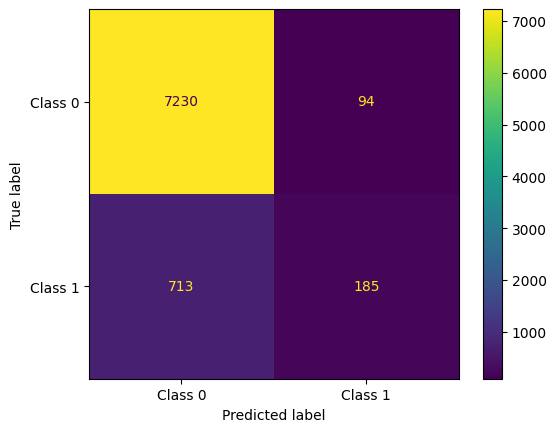

In [116]:
labels = ['Class 0', 'Class 1']
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot()
plt.show()

<span style="color:green"> Summary</span>  
<span style="color:green"> recall score = 185 / 898 = 20.6% </span>  
<span style="color:green"> precision score = 185 / 279 = 66.3% </span>  
<span style="color:green"> accuracy score = 90.2% </span>  
<span style="color:green"> baseline = 89.1% </span>  

<span style="color:green"> with the low recall and high accuracy, the issue might be due to the dataset being biased towards non sign ups.  </span>  

#### 6. Inspect the errors in more detail

Beyond summary accuracy metrics, you want to know how your model performed across various customers.

Your analysis should **not** be limited to the columns you used as features. If you used age for example, consider looking at how errors are distributed among marital status for example.

What you want to know is: ***is our model more/less accurate for different types of customers?***

An idea for this is to:
- create a column that denotes whether a customer was correctly predicted as wanting to purchase the product or not
- look at the distribution this column (i.e. the accuracy) among different categories (either age, job, education level etc.)

In [117]:
type(y_pred_class)

numpy.ndarray

In [118]:
results = X_test.copy()  # copy the test features
results['Actual'] = y_test
results['Predicted'] = y_pred_class

In [119]:
type(results['Predicted'])

pandas.core.series.Series

In [120]:
results['Correct'] = (results['Actual'] == results['Predicted']).astype(int)

In [121]:
type(results['Correct'])

pandas.core.series.Series

In [122]:
results.head()

,age,default,campaign,emp.var.rate,cons.conf.idx,euribor3m,nr.employed,contact_telephone,edu_num,marital_divorced,...,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,Actual,Predicted,Correct
8940,31,0.0,2,1.4,-41.8,4.866,5228.1,True,7,False,...,False,False,False,False,False,False,False,0,0,1
25760,29,0.0,1,-0.1,-42.0,4.120,5195.8,False,5,False,...,False,False,False,False,False,False,False,0,0,1
30662,41,0.0,4,-1.8,-46.2,1.344,5099.1,False,5,False,...,False,False,False,False,False,False,False,0,0,1
12654,39,0.0,3,1.4,-42.7,4.960,5228.1,False,6,False,...,False,False,False,False,False,False,False,0,0,1
1997,46,0.0,2,1.1,-36.4,4.857,5191.0,True,8,True,...,False,False,False,False,True,False,False,0,0,1


In [123]:
results.columns

Index(['age', 'default', 'campaign', 'emp.var.rate', 'cons.conf.idx',
       'euribor3m', 'nr.employed', 'contact_telephone', 'edu_num',
       'marital_divorced', 'marital_single', 'poutcome_failure',
       'poutcome_success', 'month_apr', 'month_aug', 'month_dec', 'month_jul',
       'month_jun', 'month_mar', 'month_nov', 'month_oct', 'month_sep',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'Actual', 'Predicted', 'Correct'],
      dtype='object')

In [124]:
# testing accuracy across marital status and seems to be mostly accurate across different marital status
pd.DataFrame(results.groupby(['marital_divorced', 'marital_single'])['Correct'].mean())

Correct
marital_divorced marital_single          
False            False           0.910411
                 True            0.878635
True             False           0.915625

In [125]:
# testing accuracy across educational level and seems to be mostly accurate across different educational level
pd.DataFrame(results.groupby(['edu_num'])['Correct'].mean())

,Correct
edu_num,
1,0.850136
2,0.800000
3,0.932584
4,0.920833
5,0.923404
6,0.903243
7,0.881168
8,0.909343


In [126]:
# testing accuracy across poutcome and seems that the model did not work well with customers with poutcome_success 
pd.DataFrame(results.groupby(['poutcome_success','poutcome_failure'])['Correct'].mean())

Correct
poutcome_success poutcome_failure          
False            False             0.914756
                 True              0.872664
True             False             0.642023

In [127]:
# testing accuracy by contact method 
pd.DataFrame(results.groupby(['contact_telephone'])['Correct'].mean())

,Correct
contact_telephone,
False,0.873043
True,0.952413


In [128]:
# testing accuracy by job type
pd.DataFrame(results.groupby(['job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown'])['Correct'].mean())

Correct
job_blue-collar job_entrepreneur job_housemaid job_management job_retired job_self-employed job_services job_student job_technician job_unemployed job_unknown          
False           False            False         False          False       False             False        False       False          False          False        0.893066
                                                                                                                                                   True         0.875000
                                                                                                                                    True           False        0.879630
                                                                                                                     True           False          False        0.905007
                                                                                                         True        False          False          False        0.723077
                                                                                            True         False       False          False          False        0.926606
                                                                          True              False        False       False          False          False        0.893773
                                                              True        False             False        False       False          False          False        0.797927
                                               True           False       False             False        False       False          False          False        0.889286
                                 True          False          False       False             False        False       False          False          False        0.929577
                True             False         False          False       False             False        False       False          False          False        0.905229
True            False            False         False          False       False             False        False       False          False          False        0.944565

In [129]:
# testing accuracy by month of year 
pd.DataFrame(results.groupby(['month_apr', 'month_aug', 'month_dec', 'month_jul',
       'month_jun', 'month_mar', 'month_nov', 'month_oct', 'month_sep'])['Correct'].mean())

Correct
month_apr month_aug month_dec month_jul month_jun month_mar month_nov month_oct month_sep          
False     False     False     False     False     False     False     False     False      0.942349
                                                                                True       0.647059
                                                                      True      False      0.536232
                                                            True      False     False      0.904306
                                                  True      False     False     False      0.653061
                                        True      False     False     False     False      0.899713
                              True      False     False     False     False     False      0.930961
                    True      False     False     False     False     False     False      0.794118
          True      False     False     False     False     False     False     False      0.908055
True      False     False     False     False     False     False     False     False      0.796443

In [130]:
# testing accuracy by default
pd.DataFrame(results.groupby(['default'])['Correct'].mean())

,Correct
default,
0.0,0.901837
1.0,1.000000


#### 7. Build your second model

Now try to change something based on the process and results so far, and inspect the accuracy and confusion matrix again

- If you are happy with your features, you could tweak some parameters in your classifier
- If you had some additional features you thought may be useful, try adding them
- BONUS: you could even *create* new features based on your EDA!

<span style="color:green"> From the above test, it seems like the features such as job types, month of year and poutcome has shown greater distribution of accuracy. Hence, will test with features without this three features for the new model </span>  

In [131]:
feature_columns = ['age','default','campaign','emp.var.rate','cons.conf.idx','euribor3m', 'nr.employed','contact_telephone',
                   'edu_num','marital_divorced', 'marital_single']
X = bank_model_df[feature_columns]
y = bank_model_df['y']

In [132]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [133]:
# splitting X_train and X_test into categorical and numerical for scaling of numerical 
X_train_numeric = X_train[['age','campaign','emp.var.rate','cons.conf.idx','euribor3m','nr.employed']]
X_test_numeric = X_test[['age','campaign','emp.var.rate','cons.conf.idx','euribor3m','nr.employed']]
X_train_cat = X_train[['default','contact_telephone','edu_num','marital_divorced', 'marital_single']]
X_test_cat = X_test[['default','contact_telephone','edu_num','marital_divorced', 'marital_single']]

In [134]:
# perform scaling on numeric
scaler = StandardScaler()
X_train_numeric = scaler.fit_transform(X_train_numeric)
X_test_numeric = scaler.transform(X_test_numeric)

In [135]:
X_train_comb = np.concatenate([X_train_numeric, X_train_cat], axis=1)
X_test_comb = np.concatenate([X_test_numeric, X_test_cat], axis=1)

In [136]:
# searching for the best K to give higest accuracy
accuracy_list = []
for k in range(1,101):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_comb,y_train)
    y_pred_class = knn.predict(X_test_comb)
    accuracy_list.append(metrics.accuracy_score(y_test,y_pred_class))

accuracy_result = pd.DataFrame({'K':range(1,101), 'accuracy':accuracy_list})

In [137]:
# model appears to be most accurate when K = 26 
accuracy_result.sort_values('accuracy', ascending= False)

,K,accuracy
25,26,0.897957
41,42,0.897835
35,36,0.897713
34,35,0.897713
54,55,0.897713
...,...,...
8,9,0.889565
4,5,0.887254
1,2,0.886402
2,3,0.879105


In [138]:
px.line(accuracy_result, x = "K", y = "accuracy")

In [139]:
# using K-Nearest neighbour 
knn = KNeighborsClassifier(n_neighbors=26)
knn.fit(X_train_comb,y_train)

,n_neighbors,26
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [140]:
# getting y_pred_class
y_pred_class = knn.predict(X_test_comb)

In [141]:
# accuracy score of KNN model 
print(metrics.accuracy_score(y_test,y_pred_class))

0.8979567015324739


In [142]:
cm = confusion_matrix (y_test,y_pred_class)
print (cm)

[[7178  146]
 [ 693  205]]


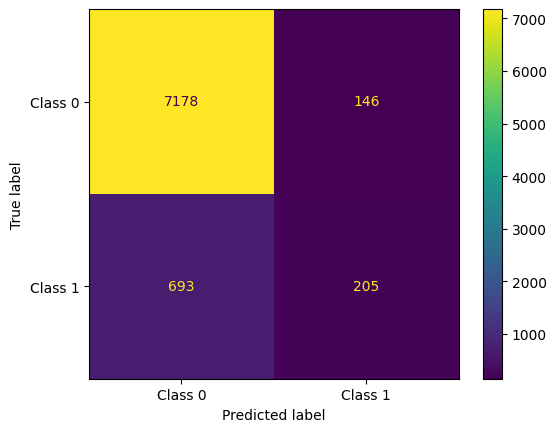

In [143]:
labels = ['Class 0', 'Class 1']
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot()
plt.show()

In [144]:
# percentage of majority class
print ((7178 + 146)/(7178 + 146 + 693 + 205)) 

0.8907808319143761


<span style="color:green"> accuracy score of model remains to be higher than majority class</span>  
<span style="color:green"> recall = 205/898 = 22.8%, which is higher than the previous model.  </span>  
<span style="color:green"> precision = 205/351 = 58%  </span>  
<span style="color:green"> accuracy = 205/351 = 89.8%  </span>

#### 8. Finally, evaluate both models on the test set

How did your two models perform? Which was better?

<span style="color:green"> both models perform similar in terms of accuracy. Model B improved only slightly with recall score. And because the intention is to predict better to catch customers who will buy the product, in that view, model B will be better due to the higher recall score. the recall results overall still performs badly as the dataset is imbalance biased towards customers who did not buy the term deposit. Results would probably be better if resampling techniques is performed using imblearn  and over sample the minority class.  </span>

accuracy - model A: 90.2% / model B: 89.8%  
precision - model A : 66.3% / model B : 58%  
recall - model A: 20.6% / model B : 22.8% 

## Part 3, applying SMOTE to the biased dataset

In [225]:
pd.DataFrame(y_train).shape

(32886, 1)

In [226]:
pd.DataFrame(y_train).sum()

y    3730
dtype: int64

In [227]:
# the data set is very biased towards no sign up 
print(f'only {round((3730/32886)*100,2)}% signed up for the deposit')

only 11.34% signed up for the deposit


In [ ]:
# sign up is positive class and no sign up is negative class

In [151]:
# performing the smote technique to oversample the sign up 
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train_comb, y_train)

In [152]:
# searching for the best K to give higest accuracy
accuracy_list = []
for k in range(1,101):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_res,y_train_res)
    y_pred_class = knn.predict(X_test_comb)
    accuracy_list.append(metrics.accuracy_score(y_test,y_pred_class))

accuracy_result = pd.DataFrame({'K':range(1,101), 'accuracy':accuracy_list})

In [153]:
px.line(accuracy_result, x = "K", y = "accuracy")

## train model with K = 3

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_res,y_train_res)
y_pred_class = knn.predict(X_test_comb)

In [ ]:
print(f'accuracy: {metrics.accuracy_score(y_test,y_pred_class)}')
print(f'recall: {metrics.recall_score(y_test,y_pred_class)}')
print(f'precision: {metrics.precision_score(y_test,y_pred_class)}')

accuracy: 0.809778642666018
recall: 0.46547884187082406
precision: 0.2782956058588549


Recall significantly improved to 47%

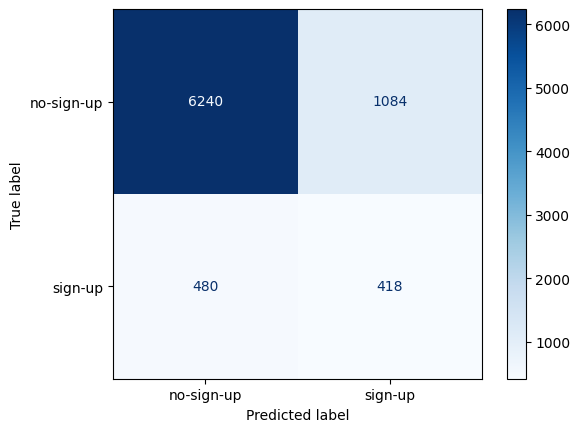

In [159]:
cm = confusion_matrix (y_test,y_pred_class)
labels = ['no-sign-up', 'sign-up']
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels, )
disp.plot(cmap='Blues')
plt.show()

## Testing with Logistic regression

In [160]:
from sklearn.linear_model import LogisticRegression

In [216]:
lr = LogisticRegression(solver='liblinear',penalty= 'l1',class_weight='balanced', random_state=42)
lr.fit(X_train_comb,y_train)

,penalty,'l1'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,'balanced'
,random_state,42
,solver,'liblinear'
,max_iter,100
,multi_class,'deprecated'


In [217]:
y_pred_class = lr.predict(X_test_comb)

In [218]:
print(f'accuracy: {metrics.accuracy_score(y_test,y_pred_class)}')
print(f'recall: {metrics.recall_score(y_test,y_pred_class)}')
print(f'precision: {metrics.precision_score(y_test,y_pred_class)}')

accuracy: 0.7306008270493797
recall: 0.7160356347438753
precision: 0.2470226661544372


recall improved to 71% with L1 penalty

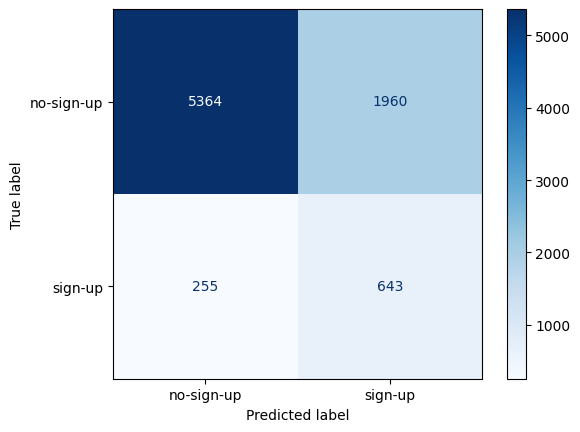

In [219]:
cm = confusion_matrix (y_test,y_pred_class)
labels = ['no-sign-up', 'sign-up']
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels, )
disp.plot(cmap='Blues')
plt.show()

## repeat with customise weight class

accuracy: 0.6143274142544393
recall: 0.7817371937639198
precision: 0.1909165080228447


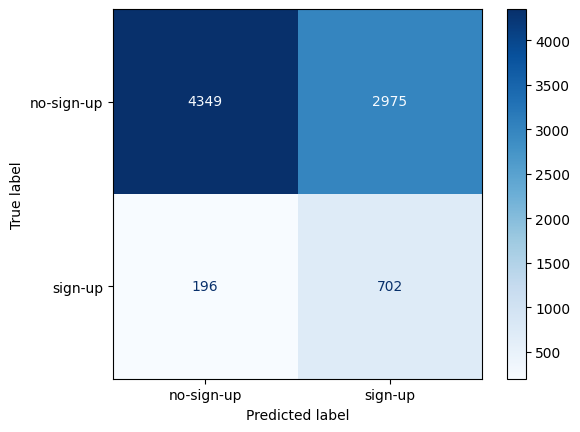

In [221]:
lr = LogisticRegression(solver='liblinear',penalty= 'l1',class_weight={0:1 ,1:15 }, random_state=42)
lr.fit(X_train_comb,y_train)
y_pred_class = lr.predict(X_test_comb)
print(f'accuracy: {metrics.accuracy_score(y_test,y_pred_class)}')
print(f'recall: {metrics.recall_score(y_test,y_pred_class)}')
print(f'precision: {metrics.precision_score(y_test,y_pred_class)}')



cm = confusion_matrix (y_test,y_pred_class)
labels = ['no-sign-up', 'sign-up']
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels, )
disp.plot(cmap='Blues')
plt.show()

for this business case, it is better to use logistice regression as it is easier to control the recall score. Accuracy is not that important in this case as no sign ups is always going to be the majority, even without the model, we are able to be above 50% accurate. recall is more important as we want to effeciently catch potential sign up customers but require less resources as we can immediately spend less time on non sign up customers. 